In [2]:
from scipy.interpolate import griddata
import numpy as np
import xarray as xr


In [3]:
dataset = xr.open_dataset("data/filtered_aod_data.nc")
aods = dataset.AOD550
aods = aods.fillna(0)

bounds = {"maxLat": aods.Latitude.values.max(), "minLat": aods.Latitude.values.min(),
            "maxLon": aods.Longitude.values.max(), "minLon": aods.Longitude.values.min()}
print(bounds)

# This is the shape of the input matrix
numLonPoints = 10j
numLatPoints = 10j

grid_lon, grid_lat = np.mgrid[bounds["minLon"]:bounds["maxLon"]:numLonPoints, bounds["minLat"]:bounds["maxLat"]:numLatPoints]

points = []
aod_array = []

for i in range(len(aods)):
    for j in range(len(aods[0])):
        points.append([aods.Longitude.values[i][j], aods.Latitude.values[i][j]])
        aod_array.append(aods.values[i][j])
        
    print(i / len(aods))

grid1 = griddata(points, aod_array, (grid_lon, grid_lat), method="nearest")


{'maxLat': -5.021431, 'minLat': -14.202735, 'maxLon': 82.1284, 'minLon': 53.295666}
0.0
0.0013020833333333333
0.0026041666666666665
0.00390625
0.005208333333333333
0.006510416666666667
0.0078125
0.009114583333333334
0.010416666666666666
0.01171875
0.013020833333333334
0.014322916666666666
0.015625
0.016927083333333332
0.018229166666666668
0.01953125
0.020833333333333332
0.022135416666666668
0.0234375
0.024739583333333332
0.026041666666666668
0.02734375
0.028645833333333332
0.029947916666666668
0.03125
0.032552083333333336
0.033854166666666664
0.03515625
0.036458333333333336
0.037760416666666664
0.0390625
0.040364583333333336
0.041666666666666664
0.04296875
0.044270833333333336
0.045572916666666664
0.046875
0.048177083333333336
0.049479166666666664
0.05078125
0.052083333333333336
0.053385416666666664
0.0546875
0.055989583333333336
0.057291666666666664
0.05859375
0.059895833333333336
0.061197916666666664
0.0625
0.06380208333333333
0.06510416666666667
0.06640625
0.06770833333333333
0.0690

0.6471354166666666
0.6484375
0.6497395833333334
0.6510416666666666
0.65234375
0.6536458333333334
0.6549479166666666
0.65625
0.6575520833333334
0.6588541666666666
0.66015625
0.6614583333333334
0.6627604166666666
0.6640625
0.6653645833333334
0.6666666666666666
0.66796875
0.6692708333333334
0.6705729166666666
0.671875
0.6731770833333334
0.6744791666666666
0.67578125
0.6770833333333334
0.6783854166666666
0.6796875
0.6809895833333334
0.6822916666666666
0.68359375
0.6848958333333334
0.6861979166666666
0.6875
0.6888020833333334
0.6901041666666666
0.69140625
0.6927083333333334
0.6940104166666666
0.6953125
0.6966145833333334
0.6979166666666666
0.69921875
0.7005208333333334
0.7018229166666666
0.703125
0.7044270833333334
0.7057291666666666
0.70703125
0.7083333333333334
0.7096354166666666
0.7109375
0.7122395833333334
0.7135416666666666
0.71484375
0.7161458333333334
0.7174479166666666
0.71875
0.7200520833333334
0.7213541666666666
0.72265625
0.7239583333333334
0.7252604166666666
0.7265625
0.72786458

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(grid1.T)
plt.show()

In [9]:
numLonPoints = 200j
numLatPoints = 80j

grid_lon, grid_lat = np.mgrid[bounds["minLon"]:bounds["maxLon"]:numLonPoints, bounds["minLat"]:bounds["maxLat"]:numLatPoints]

grid2 = griddata(points, aod_array, (grid_lon, grid_lat), method="linear")
grid3 = griddata(points, aod_array, (grid_lon, grid_lat), method="nearest")



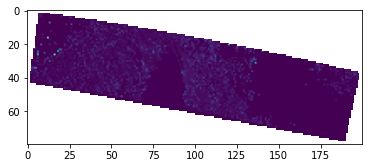

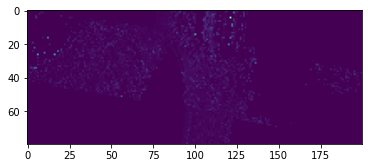

In [10]:

plt.pcolormesh(grid_lon, grid_lat, grid2.T, transform=ccrs.PlateCarree(), cmap="viridis")
plt.show()
plt.imshow(grid3.T)
plt.show()